This exercise used PCA to decomposite all traffic data over different periods and summarize into features of less dimension. For example, by noticing that central, townhall and wynyard have high incoming traffic during the morning peak hours and outgoing traffic during afternoon/evening peak hours, PCA reproduce a new features column and allocate high values to that feature column for these three sentences.  

In [2]:
import pandas 
import numpy 
import sklearn.decomposition
import matplotlib.pyplot

In [5]:
%matplotlib inline

In [8]:
all_trains = pandas.read_csv('../../../data/sydtrains.csv', index_col=1, thousands=',')

In [36]:
trains = all_trains[all_trains.YEAR==2014]
trains

LINE  YEAR SURVEY_DATE_USED  \
STATION                                                                        
Central                                           CBD  2014        6/05/2014   
Town Hall                                         CBD  2014        7/05/2014   
Wynyard                                           CBD  2014       20/05/2014   
Parramatta                                    Western  2014       19/11/2014   
North Sydney                              North Shore  2014       19/08/2014   
Redfern                                           CBD  2014        1/05/2014   
Chatswood                                 North Shore  2014       19/08/2014   
Bondi Junction                        Eastern Suburbs  2014        2/09/2014   
Strathfield                                Inner West  2014        9/09/2014   
Circular Quay                                     CBD  2014       22/05/2014   
Martin Place                                      CBD  2014       27/05/2014   
Hurstville                                  Illawarra  2014       28/05/2014   
St Leonards                               North Shore  2014       27/05/2014   
Blacktown                                     Western  2014       14/10/2014   
Burwood                                    Inner West  2014        9/09/2014   
Kings Cross                           Eastern Suburbs  2014        3/09/2013   
Hornsby                                   North Shore  2014       14/05/2014   
Ashfield                                   Inner West  2014        4/09/2013   
Kogarah                                     Illawarra  2014       19/06/2014   
Lidcombe                                        South  2014        5/06/2014   
Auburn                                        Western  2014       19/11/2014   
Museum                                            CBD  2014       22/05/2014   
Epping                       Northern via Strathfield  2014       21/05/2014   
Macquarie University      Northern via Macquarie Park  2014       21/05/2014   
St James                                          CBD  2014       27/05/2014   
Rockdale                                    Illawarra  2014       28/05/2014   
Cabramatta                                      South  2014       11/06/2014   
Bankstown                                   Bankstown  2014       13/05/2014   
Liverpool                                       South  2014        4/06/2014   
Sutherland                                  Illawarra  2014       12/06/2014   
...                                               ...   ...              ...   
Menangle Park                      Southern Highlands  2014       19/06/2014   
Port Kembla North                         South Coast  2014       18/09/2014   
Scone                                          Hunter  2014        3/06/2009   
Tarro                                          Hunter  2014        3/06/2009   
Aberdeen                                       Hunter  2014        3/06/2009   
Bombo                                     South Coast  2014       18/09/2014   
Branxton                                       Hunter  2014        3/06/2009   
Burradoo                           Southern Highlands  2014       25/05/2010   
Coalcliff                                 South Coast  2014        9/08/2012   
Dunmore (Shellharbour)                    South Coast  2014       18/06/2014   
Exeter                             Southern Highlands  2014       25/05/2010   
Greta                                          Hunter  2014        3/06/2009   
Linden                                 Blue Mountains  2014       19/08/2014   
Marulan                            Southern Highlands  2014       17/06/2014   
Menangle                           Southern Highlands  2014       17/06/2014   
Paterson                                       Hunter  2014        3/06/2009   
Scarborough                               South Coast  2014       22/08/2013   
Tallong                            Southern Highl

In [11]:
numeric_columns=[x for x in trains.columns if x.endswith('0')]
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [12]:
import sklearn.decomposition

In [13]:
pca = sklearn.decomposition.PCA(whiten=True)

In [14]:
mangled_station_data=pca.fit_transform(trains[numeric_columns])

In [15]:
mangled_station_data

array([[ -9.99249128,  -0.86429306,  -8.26969232, ...,   0.52481657,
         -0.97881544,   0.01429659],
       [ -9.49158615,   2.10975144,  -4.07870519, ...,  -0.18495588,
         -0.50349106,   0.13775049],
       [ -7.04285247,   5.71226833,  10.11088049, ...,  -0.05141355,
         -0.44220709,  -0.78419011],
       ..., 
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209],
       [  0.32010123,   0.60167819,  -0.30881945, ...,  -0.16576932,
         -0.04395234,   0.05612209]])

In [19]:
def colouring(line):
    if line =='CBD': return 'red'
    if line =='Western': return 'green'
    if line =='Eastern Suburbs': return 'pink'
    return 'blue'
colour_chart = list(map(colouring, trains.LINE))
colour_chart

['red',
 'red',
 'red',
 'green',
 'blue',
 'red',
 'blue',
 'pink',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'green',
 'blue',
 'pink',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'pink',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 '

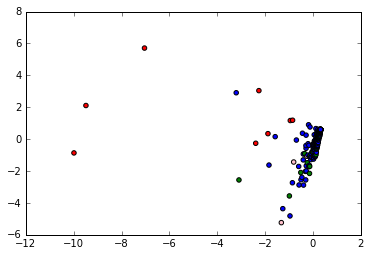

In [20]:
matplotlib.pyplot.scatter(mangled_station_data[:,0], mangled_station_data[:,1], c=colour_chart)

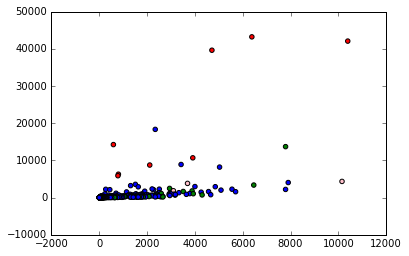

In [21]:
matplotlib.pyplot.scatter(trains.IN_0600_0930,trains.OUT_0600_0930, c=colour_chart)

In [22]:
# finding the relevance of features by
pca.explained_variance_ratio_

array([  9.25253343e-01,   6.13005818e-02,   9.75370440e-03,
         1.78539213e-03,   1.02884474e-03,   4.50450877e-04,
         3.71449167e-04,   5.16184369e-05,   4.48104295e-06,
         1.33981591e-07])

In [24]:
for r in pca.explained_variance_ratio_: 
    print ("%.2f" % (r%100,))

0.93
0.06
0.01
0.00
0.00
0.00
0.00
0.00
0.00
0.00


In [25]:
pca.components_

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756],
       [ 0.00560474, -0.00450715,  0.40359311,  0.42393126, -0.27283612,
        -0.66111334,  0.07761719,  0.05264239, -0.3686114 ,  0.03409918],
       [ 0.00653215,  0.005783  , -0.11162783,  0.05920499, -0.25380845,
        -0.34804601, -0.20313728,  0.35921969,  0.77966863,  0.14218445],
       [-0.00422339, -0.00167244, -0.20918806, -0.14272018,  0.2436577 ,
        -0.25405611,  0.1899084 , -0.25989915, -0.03726531,  0.84079463],
       [-0.0084373 , -0.02423273,  0.39522302, -0.1236274 , -0.67429792,
         0.34138853,  0.15157494, -0.3875952 ,  0.17532311,  0.22954217],
       [-0.03164292,  0.01273045,  0.27397658,  0.43191696,  0.33258827,
         0.09438617, -0.60461027, -0.45598628

In [26]:
numeric_columns

['IN_0200_0600',
 'OUT_0200_0600',
 'IN_0600_0930',
 'OUT_0600_0930',
 'IN_0930_1500',
 'OUT_0930_1500',
 'IN_1500_1830',
 'OUT_1500_1830',
 'IN_1830_0200',
 'OUT_1830_0200']

In [28]:
pca.inverse_transform([0,0,1,0,0,0,0,0,0,0])

array([   56.44365565,    29.62585184,  1485.96327223,  1455.72559444,
         568.59383814,   302.24034999,  1286.37770554,  1172.18083202,
         102.34096627,   539.83482948])

In [29]:
mangled_station_data[trains.index=='Central']

array([[-9.99249128, -0.86429306, -8.26969232, -6.17066718, -1.63718664,
         2.43026268,  2.82833108,  0.52481657, -0.97881544,  0.01429659]])

In [30]:
mangled_station_data[trains.index=='Bondi Junction']

array([[-1.32061629, -5.23695032,  2.29484114,  1.42884695, -1.36474663,
         5.99142405,  1.92812231, -1.48419539,  1.72644061, -0.06481982]])

In [31]:
mangled_station_data[trains.index=='Town Hall']

array([[ -9.49158615,   2.10975144,  -4.07870519,  11.91317797,
         -0.53502771,  -1.06419605,  -2.3107553 ,  -0.18495588,
         -0.50349106,   0.13775049]])

In [32]:
pca.inverse_transform([0,1,0,0,0,0,0,0,0,0])
# 

array([   30.61447705,    23.14270432,   -50.02729636,  1783.86891121,
         314.66670487,   519.01167837,  1585.17417363,   116.32887549,
         538.69093488,   -22.19663078])

In [33]:
pca.inverse_transform([-1.3,-5,2,0,0,6,2,0,0,0]) # simulate bondi junction 

array([  268.79276949,   170.52538641,  9718.67797976,  4260.36564932,
        4477.12607503,  4723.39694641,  5353.09290799,  7794.13873323,
        1604.2383566 ,  4463.71960403])

In [35]:
pca.inverse_transform([-10,0,0,0,0,0,0,0,0,0])

array([   961.61493118,    916.26403361,  11318.20142194,  45280.68631509,
        19001.13668724,  24730.66775277,  46073.28415773,  16703.63718178,
        18233.24479258,   7959.73876086])

In [37]:
simplifier = sklearn.decomposition.PCA(whiten =True, n_components=2)

In [38]:
simplified_data=simplifier.fit_transform(trains[numeric_columns])

In [39]:
simplified_data

array([[ -9.99249128e+00,  -8.64293060e-01],
       [ -9.49158615e+00,   2.10975144e+00],
       [ -7.04285247e+00,   5.71226833e+00],
       [ -3.09312274e+00,  -2.56002800e+00],
       [ -3.20762483e+00,   2.90955318e+00],
       [ -2.39183662e+00,  -2.58609347e-01],
       [ -1.83743736e+00,  -1.62604137e+00],
       [ -1.32061629e+00,  -5.23695032e+00],
       [ -1.25954002e+00,  -4.36105965e+00],
       [ -1.88067667e+00,   3.45007538e-01],
       [ -2.25922559e+00,   3.04325248e+00],
       [ -9.59150871e-01,  -4.81643143e+00],
       [ -1.57813698e+00,   1.55865986e-01],
       [ -9.84131498e-01,  -3.56265955e+00],
       [ -8.57598095e-01,  -2.73547475e+00],
       [ -8.04225883e-01,  -1.43436013e+00],
       [ -5.80001780e-01,  -2.87453133e+00],
       [ -4.98311828e-01,  -2.54384632e+00],
       [ -5.94508410e-01,  -1.71277446e+00],
       [ -4.60240465e-01,  -2.39547651e+00],
       [ -5.07409934e-01,  -2.09305422e+00],
       [ -9.47336062e-01,   1.16755332e+00],
       [ -

In [40]:
reconstructed =simplifier.inverse_transform(simplified_data)

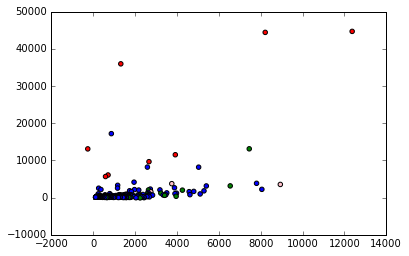

In [41]:
matplotlib.pyplot.scatter(reconstructed[:,2], reconstructed[:,3], c=colour_chart)

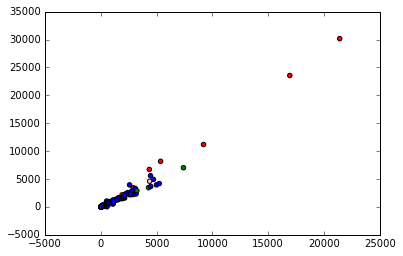

In [42]:
matplotlib.pyplot.scatter(trains.IN_0930_1500, trains.OUT_0930_1500, c=colour_chart)

In [43]:
simplifier.explained_variance_

array([ 55857012.01047664,   3700680.85652542])

In [44]:
simplifier.explained_variance_ratio_

array([ 0.92525334,  0.06130058])

In [45]:
simplifier.components_

array([[-0.01216888, -0.01181708, -0.13570067, -0.59073739, -0.243829  ,
        -0.32006833, -0.60005267, -0.20835379, -0.23880968, -0.09962957],
       [-0.01119104, -0.00516797, -0.637461  ,  0.33967958, -0.24082972,
        -0.15102742,  0.18628327, -0.52786231,  0.0797915 , -0.27855756]])

In [49]:
sparse=sklearn.decomposition.SparsePCA(n_components=6)

In [50]:
sparse_data = sparse.fit_transform(trains[numeric_columns])

In [51]:
sparse.components_

array([[ -1.79368881e+03,  -1.64476930e+03,  -2.31054403e+04,
         -8.02488504e+04,  -3.43536644e+04,  -4.41667041e+04,
         -8.16586139e+04,  -3.16942983e+04,  -3.14615578e+04,
         -1.46248319e+04],
       [  5.09232864e+02,   1.61876235e+02,   2.59459201e+04,
         -1.27290671e+04,   7.44349982e+03,   3.61661645e+03,
         -8.26540892e+03,   2.05535960e+04,  -4.07056360e+03,
          9.94289488e+03],
       [  8.22324344e+01,  -6.68557959e+01,   4.46177729e+03,
          5.84110325e+03,  -4.03577675e+03,  -9.72718100e+03,
          7.25847429e+02,   8.78425517e+01,  -5.10029929e+03,
          0.00000000e+00],
       [  3.81734238e+01,   3.19421337e+01,  -4.29703698e+02,
          2.10058879e+02,  -1.53479312e+03,  -1.35488947e+03,
         -1.16752629e+03,   2.23454154e+03,   4.78580853e+03,
          5.69056820e+02],
       [  2.78413502e+01,   1.19389298e+01,   0.00000000e+00,
          5.54510095e+02,  -7.80036919e+02,   1.10024872e+03,
         -9.73196700e+02

In [52]:
sparse_data[:,1].min()

-0.28755231917234464

In [53]:
sparse_data[sparse_data[:,1]<-0.28]

array([[-0.4003242 , -0.28755232,  0.59453027, -0.03555059,  0.16769156,
         0.06017031]])

In [56]:
trains[sparse_data[:,1]<-0.28]


LINE  YEAR SURVEY_DATE_USED WHETHER_SURVEYED  IN_0200_0600  \
STATION                                                              
Wynyard  CBD  2014       20/05/2014              Yes           590   

         OUT_0200_0600  IN_0600_0930  OUT_0600_0930  IN_0930_1500  \
STATION                                                             
Wynyard            570          4710          39620          9200   

         OUT_0930_1500  IN_1500_1830  OUT_1500_1830  IN_1830_0200  \
STATION                                                             
Wynyard          11180         35010           6510         10690   

         OUT_1830_0200  IN_24_HOURS  OUT_24_HOURS  RANK  STATION_SORT_ID  
STATION                                                                   
Wynyard           2330        60200         60200     3              103

In [57]:
import sklearn.manifold

In [61]:
lle=sklearn.manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=20, method='modified')

In [64]:
lle_transformered = lle.fit_transform(trains[numeric_columns])

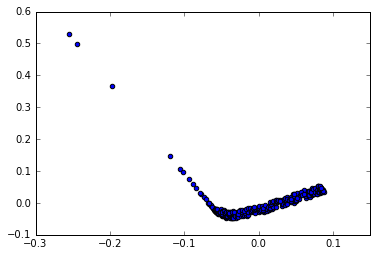

In [67]:
matplotlib.pyplot.scatter(lle_transformered[:,0], lle_transformered[:,1])